In [1]:
from glob import glob 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import json 
import os 

import yaml 

from src  import Reconstruction_Metric,create_transformation,Machine_Metric
from tqdm import tqdm 

# Pre process 

## Reconstruction 방식 확인 

In [2]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values
aug_name = pd.Series(dirs).apply(lambda x : x.split('/')[-1]).values

In [12]:

AUROC = [] 
ROC = [] 
METRIC = []
roc = [] 
Machine_METRIC = [] 
auroc = [] 
for dir,name in zip(dirs,aug_name):
    try:
        with open (sorted(glob(os.path.join(dir,'*')))[0],'rb') as f:
            data = json.load(f)
        [fpr,tpr,_] = data['auto']['roc']
        [acc,pre,rec,f1] = data['auto']['metric']

        AUROC.append(data['auto']['auroc'])
        ROC.append([fpr,tpr])
        METRIC.append([acc,pre,rec,f1])

        Machine_METRIC.append(data['machine']['metric'])
        roc.append(data['machine']['roc'])
        auroc.append(data['machine']['auroc'])

    except:
        pass
ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)
Machine_METRIC = np.array(Machine_METRIC)
auroc = np.array(auroc)
roc = np.array(roc)

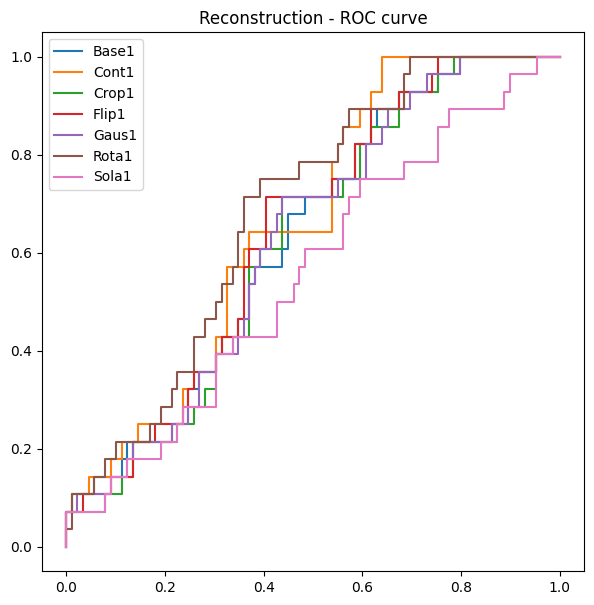

In [13]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))
plt.title('Reconstruction - ROC curve')
for (fpr,tpr),name in zip(ROC,aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [14]:
auto_metric = pd.DataFrame(np.c_[METRIC,AUROC])
auto_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
auto_metric = auto_metric.rename(index={key:value for key,value in enumerate(aug_name)})
auto_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Base1,0.333333,0.739130,0.191011,0.303571,0.6288
Cont1,0.358974,0.718750,0.258427,0.380165,0.6593
Crop1,0.299145,0.684211,0.146067,0.240741,0.6212
Flip1,0.324786,0.727273,0.179775,0.288288,0.6409
Gaus1,0.307692,0.700000,0.157303,0.256881,0.6264
Rota1,0.341880,0.687500,0.247191,0.363636,0.6842
Sola1,0.282051,0.777778,0.078652,0.142857,0.5550


## Machine Learning 방식 확인 

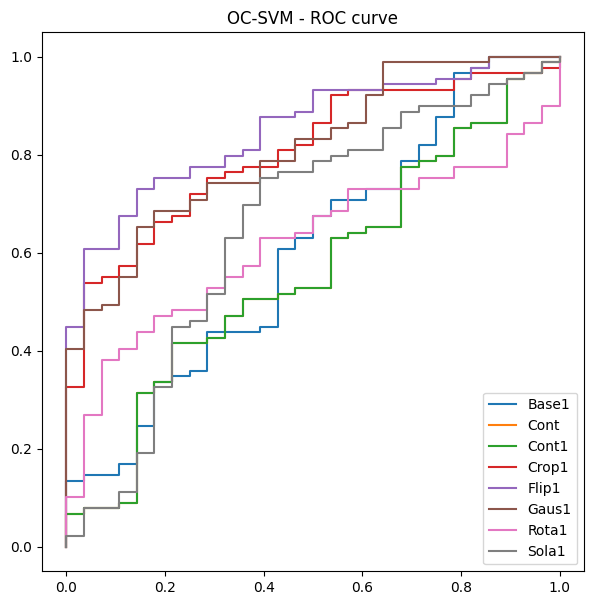

In [8]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(7,7))
plt.title('OC-SVM - ROC curve')
for (fpr,tpr,_),name in zip(roc,aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [15]:
machine_metric = pd.DataFrame(np.c_[Machine_METRIC,auroc])
machine_metric.columns = ['Accuracy','Precision','Recall','F1-score','Auroc']
machine_metric = machine_metric.rename(index={key:value for key,value in enumerate(aug_name)})
machine_metric

,Accuracy,Precision,Recall,F1-score,Auroc
Base1,0.521368,0.789474,0.505618,0.616438,0.6023
Cont1,0.478632,0.850000,0.382022,0.527132,0.5610
Crop1,0.470085,1.000000,0.303371,0.465517,0.8050
Flip1,0.435897,1.000000,0.258427,0.410714,0.8507
Gaus1,0.564103,0.975000,0.438202,0.604651,0.8106
Rota1,0.512821,0.921053,0.393258,0.551181,0.6180
Sola1,0.564103,0.851852,0.516854,0.643357,0.6521


# Post process 

## Reconstruction metric 

In [16]:
import yaml 
cfg = yaml.load(open('./Save_models/Base1/config.yaml','r'), Loader=yaml.FullLoader)

In [9]:
from src  import Reconstruction_Metric,create_transformation
from tqdm import tqdm 
AUROC = [] 
ROC = [] 
METRIC = [] 
for i in tqdm(range(7)):
    cfg['aug_number'] = i 
    trans = create_transformation(cfg)
    Recon = Reconstruction_Metric(cfg,trans)
    [auroc,roc],metric = Recon.main()
    AUROC.append(auroc)
    ROC.append(roc)
    METRIC.append(metric)

ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)    

100%|██████████| 7/7 [01:49<00:00, 15.63s/it]


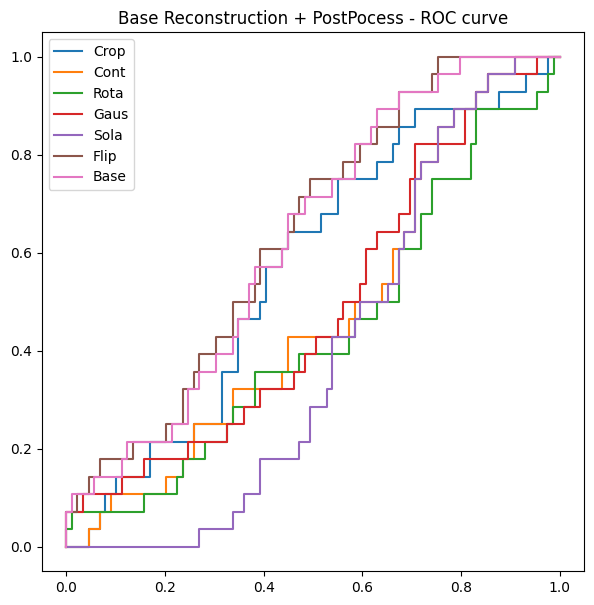

In [10]:
aug_name = ['Crop','Cont','Rota','Gaus','Sola','Flip','Base']
plt.figure(figsize=(7,7))
plt.title('Base Reconstruction + PostPocess - ROC curve')
for (fpr,tpr),name in zip(ROC[:,:2],aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [11]:
auto_metric = pd.DataFrame(np.c_[METRIC,AUROC])
auto_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
auto_metric = auto_metric.rename(index={key:value for key,value in enumerate(aug_name)})
auto_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Crop,0.478632,0.700000,0.550562,0.616352,0.5698
Cont,0.606838,0.802817,0.640449,0.712500,0.4747
Rota,0.752137,0.763158,0.977528,0.857143,0.4370
Gaus,0.247863,0.571429,0.044944,0.083333,0.4868
Sola,0.615385,0.805556,0.651685,0.720497,0.3945
Flip,0.316239,0.714286,0.168539,0.272727,0.6384
Base,0.333333,0.739130,0.191011,0.303571,0.6288


## Machine Learning 

In [12]:
AUROC = [] 
ROC = [] 
METRIC = [] 
for i in tqdm(range(7)):
    cfg['aug_number'] = i 
    trans = create_transformation(cfg)
    Machine = Machine_Metric(cfg,trans)
    [auroc,roc],metric = Machine.main()
    AUROC.append(auroc)
    ROC.append(roc)
    METRIC.append(metric)

ROC = np.array(ROC)    
AUROC = np.array(AUROC)
METRIC = np.array(METRIC)      

100%|██████████| 7/7 [01:43<00:00, 14.77s/it]


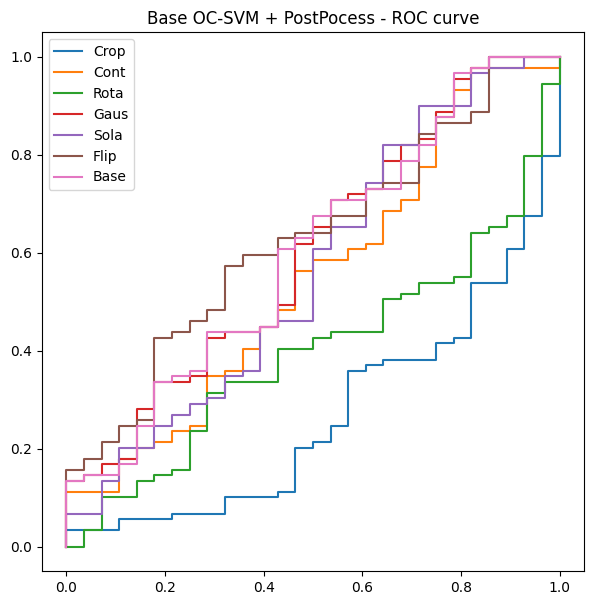

In [13]:
aug_name = ['Crop','Cont','Rota','Gaus','Sola','Flip','Base']
plt.figure(figsize=(7,7))
plt.title('Base OC-SVM + PostPocess - ROC curve')
for (fpr,tpr),name in zip(ROC[:,:2],aug_name):
    plt.plot(fpr,tpr,label=name)
plt.legend()
plt.show()    

In [14]:
Machine_metric = pd.DataFrame(np.c_[METRIC,AUROC])
Machine_metric.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
Machine_metric = Machine_metric.rename(index={key:value for key,value in enumerate(aug_name)})
Machine_metric

,Accuracy,Precision,Recall,F1-score,AUROC
Crop,0.401709,0.646154,0.471910,0.545455,0.2652
Cont,0.461538,0.782609,0.404494,0.533333,0.5457
Rota,0.461538,0.680556,0.550562,0.608696,0.3981
Gaus,0.521368,0.779661,0.516854,0.621622,0.6023
Sola,0.350427,0.782609,0.202247,0.321429,0.5634
Flip,0.598291,0.838710,0.584270,0.688742,0.6272
Base,0.521368,0.789474,0.505618,0.616438,0.6023


# Preprcoess + PostProcess 

## Reconstruction method 
- Preprocess : Rota 
- Postprocess : Flip

### Pre-Post Mixed 

In [3]:
#Preprocess : Rota  선택 
mixed_cfg = yaml.load(open('./Save_models/Rota1/config.yaml','r'), Loader=yaml.FullLoader)
#Postprocess : Crop 선택 
mixed_cfg['aug_number'] = 5

trans = create_transformation(mixed_cfg) 
mixed_Recon = Reconstruction_Metric(mixed_cfg,trans)
[mixed_AUROC,mixed_ROC],mixed_METRIC = mixed_Recon.main()

### 비교군 : Baseline 

In [4]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values

# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[0],'*')))[0],'rb') as f:
    data = json.load(f)
Base_AUROC = data['auto']['auroc']
Base_ROC = data['auto']['roc']
Base_METRIC = data['auto']['metric']

### 비교군 : Only Pre : Rotate 

In [5]:
# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[5],'*')))[0],'rb') as f:
    data = json.load(f)
pre_AUROC = data['auto']['auroc']
pre_ROC = data['auto']['roc']
pre_METRIC = data['auto']['metric']

### 비교군 : Only Post : Flip

In [6]:
# 비교군 : only postprocess 
cfg = yaml.load(open('./Save_models/Base1/config.yaml','r'), Loader=yaml.FullLoader)
cfg['aug_number'] = 5 
Recon = Reconstruction_Metric(cfg,trans)
[post_AUROC,post_ROC],post_METRIC = Recon.main()

### 비교 

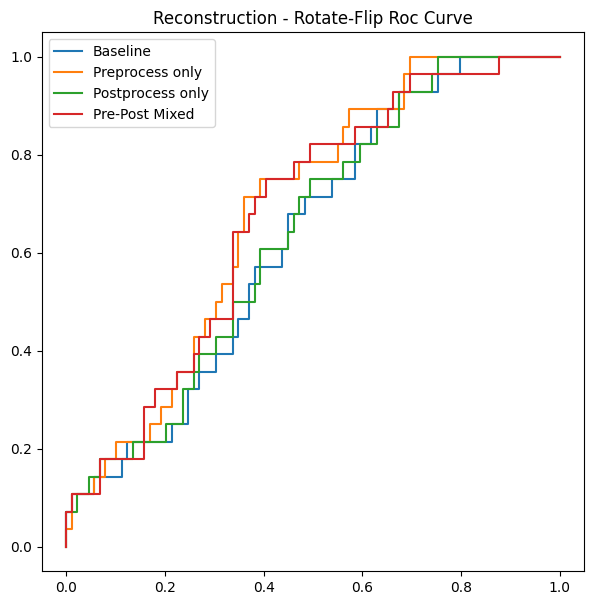

In [7]:
plt.figure(figsize=(7,7))

#Mixed 
plt.title('Reconstruction - Rotate-Flip Roc Curve')
plt.plot(Base_ROC[0],Base_ROC[1],label='Baseline')
plt.plot(pre_ROC[0],pre_ROC[1],label = 'Preprocess only')
plt.plot(post_ROC[0],post_ROC[1],label = 'Postprocess only')
plt.plot(mixed_ROC[0],mixed_ROC[1],label='Pre-Post Mixed')

plt.legend()
plt.show()

In [24]:
df = pd.DataFrame(np.c_[np.c_[Base_METRIC,pre_METRIC,post_METRIC,mixed_METRIC].T,np.r_[Base_AUROC,pre_AUROC,post_AUROC,mixed_AUROC].T])
df.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
df = df.rename(index = {0:'Baseline',1:'Pre Only',2:'Post Only',3:'Mixed'})
df

,Accuracy,Precision,Recall,F1-score,AUROC
Baseline,0.333333,0.739130,0.191011,0.303571,0.6288
Pre Only,0.341880,0.687500,0.247191,0.363636,0.6842
Post Only,0.316239,0.714286,0.168539,0.272727,0.6384
Mixed,0.341880,0.687500,0.247191,0.363636,0.6746


## Machine learning method 
- Preprocess : Gaus
- Postprocess : Flip 

### Pre-Post Mixed 

In [8]:
#Preprocess : Contrast  선택 
mixed_cfg = yaml.load(open('./Save_models/Flip1/config.yaml','r'), Loader=yaml.FullLoader)
#Postprocess : Crop 선택 
mixed_cfg['aug_number'] = 5

trans = create_transformation(mixed_cfg) 
mixed_Machine = Machine_Metric(mixed_cfg,trans)
[mixed_AUROC,mixed_ROC],mixed_METRIC = mixed_Machine.main()

### 비교군 : Baseline 

In [9]:
dirs = sorted(glob('./Save_models/*'))
dirs = pd.Series(dirs)[pd.Series(dirs).apply(lambda x : 'MVtecAD' not in x)].values

# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[0],'*')))[0],'rb') as f:
    data = json.load(f)
Base_AUROC = data['machine']['auroc']
Base_ROC = data['machine']['roc']
Base_METRIC = data['machine']['metric']

### 비교군 : only Pre : Flip

In [10]:
# 비교군 : only Preprocess 
with open (sorted(glob(os.path.join(dirs[3],'*')))[0],'rb') as f:
    data = json.load(f)
pre_AUROC = data['machine']['auroc']
pre_ROC = data['machine']['roc']
pre_METRIC = data['machine']['metric']

### 비교군 : only Post : Flip

In [11]:
# 비교군 : only postprocess 
cfg = yaml.load(open('./Save_models/Base1/config.yaml','r'), Loader=yaml.FullLoader)
cfg['aug_number'] = 5
Machine = Machine_Metric(cfg,trans)
[post_AUROC,post_ROC],post_METRIC = Machine.main()

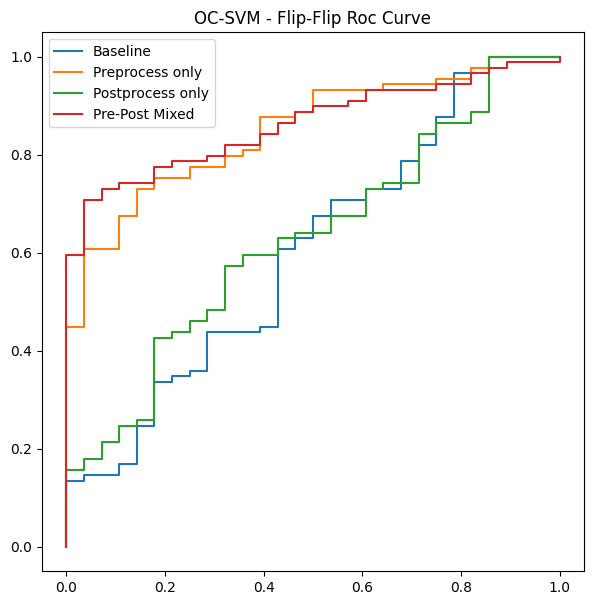

In [12]:
plt.figure(figsize=(7,7))

#Mixed 
plt.title('OC-SVM - Flip-Flip Roc Curve')
plt.plot(Base_ROC[0],Base_ROC[1],label='Baseline')
plt.plot(pre_ROC[0],pre_ROC[1],label = 'Preprocess only')
plt.plot(post_ROC[0],post_ROC[1],label = 'Postprocess only')
plt.plot(mixed_ROC[0],mixed_ROC[1],label='Pre-Post Mixed')

plt.legend()
plt.show()

In [11]:
df = pd.DataFrame(np.c_[np.c_[Base_METRIC,pre_METRIC,post_METRIC,mixed_METRIC].T,np.r_[Base_AUROC,pre_AUROC,post_AUROC,mixed_AUROC].T])
df.columns = ['Accuracy','Precision','Recall','F1-score','AUROC']
df = df.rename(index = {0:'Baseline',1:'Pre Only',2:'Post Only',3:'Mixed'})
df

,Accuracy,Precision,Recall,F1-score,AUROC
Baseline,0.521368,0.789474,0.505618,0.616438,0.6023
Pre Only,0.435897,1.000000,0.258427,0.410714,0.8507
Post Only,0.598291,0.838710,0.584270,0.688742,0.6272
Mixed,0.410256,1.000000,0.224719,0.366972,0.8620
